# Portfolio assignment 12: bivariate analysis on own dataset - numerical vs. categorical
Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you you already used for your own anlysis. 
- Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? 
- Then use seaborn barplots to check if there is a statistically significant difference. 

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('Datasets/aug_test.csv', sep=',')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,8.270.000.000.000.000,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,8.270.000.000.000.000,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
df.dtypes

enrollee_id                int64
city                      object
city_development_index    object
gender                    object
relevent_experience       object
enrolled_university       object
education_level           object
major_discipline          object
experience                object
company_size              object
company_type              object
last_new_job              object
training_hours             int64
dtype: object

## Fixing numerical data

As you can see a lot of columns have the object type. I am going to convert experience and last new job to numerical data.

### Experience

In [4]:
# setting experience <1 to 0
filter1year = df['experience'] == '<1'
df.loc[filter1year, 'experience'] = 0
df['experience'].unique()

array(['9', '5', 0, '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [5]:
# setting experience >20 to 21
filter20year = df['experience'] == '>20'
df.loc[filter20year, 'experience'] = 21
df['experience'].unique()

array(['9', '5', 0, '11', 21, '10', '14', '3', '20', '8', '4', '13', '2',
       '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [6]:
df['experience'] = pd.to_numeric(df['experience'])
df['experience'].unique()

array([ 9.,  5.,  0., 11., 21., 10., 14.,  3., 20.,  8.,  4., 13.,  2.,
        6.,  7.,  1., 19., 15., 16., nan, 17., 18., 12.])

### Last new job

In [7]:
# setting last new job never to 0
filternever = df['last_new_job'] == 'never'
df.loc[filternever, 'last_new_job'] = 0
df['last_new_job'].unique()

array(['1', 0, '>4', '2', '4', '3', nan], dtype=object)

In [8]:
# setting last new job >4 to 0
filter4more = df['last_new_job'] == '>4'
df.loc[filter4more, 'last_new_job'] = 5
df['last_new_job'].unique()

array(['1', 0, 5, '2', '4', '3', nan], dtype=object)

In [9]:
df['last_new_job'] = pd.to_numeric(df['last_new_job'])
df['last_new_job'].unique()

array([ 1.,  0.,  5.,  2.,  4.,  3., nan])

## Selecting columns

In [10]:
columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'experience', 
           'last_new_job', 'training_hours']
df = df[columns]
df.head()

,gender,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours
0,Male,Has relevent experience,Full time course,Graduate,9.0,1.0,21
1,Female,Has relevent experience,no_enrollment,Graduate,5.0,1.0,98
2,Male,No relevent experience,no_enrollment,High School,0.0,0.0,15
3,Male,Has relevent experience,no_enrollment,Masters,11.0,1.0,39
4,Male,Has relevent experience,no_enrollment,Graduate,21.0,5.0,72


## Group by

### Gender

In [11]:
df.groupby('gender').mean()

,experience,last_new_job,training_hours
gender,,,
Female,7.762963,1.635036,61.766423
Male,11.055479,2.142366,65.789041
Other,8.416667,1.708333,80.666667


It looks like men have more experience than the women and that women are less likely to change jobs.

### Relevant experience

In [12]:
df.groupby('relevent_experience').mean()

,experience,last_new_job,training_hours
relevent_experience,,,
Has relevent experience,11.640132,2.269103,65.167323
No relevent experience,6.241722,1.357877,64.519008


People with relevant experience seem to have more experience than people with no relevant experience, but are more likely to change job.

### Enrolled university
(enrolled university = Type of university of the enrollee)

In [13]:
df.groupby('enrolled_university').mean()

,experience,last_new_job,training_hours
enrolled_university,,,
Full time course,5.593103,1.281623,64.243678
Part time course,8.215278,2.034965,60.472222
no_enrollment,11.643329,2.230153,65.342330


Based on this table, I assume that people who have no enrollment have completed a training, so they have more experience.

### Education level

In [14]:
df.groupby('education_level').mean()

,experience,last_new_job,training_hours
education_level,,,
Graduate,9.763593,2.049640,64.383767
High School,6.617117,1.175115,60.815315
Masters,12.535497,2.390593,65.969758
Phd,15.314815,2.574074,74.092593
Primary School,5.833333,0.638889,71.777778


It looks like the higher the education level, the more experience the person has and the more likely the person is to change jobs.

## Plots

### Gender

#### Experience

<AxesSubplot:xlabel='gender', ylabel='experience'>

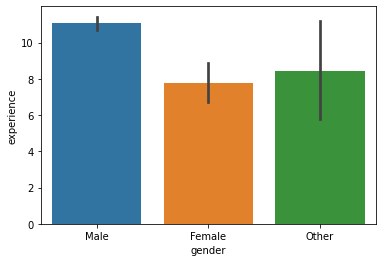

In [15]:
sns.barplot(x="gender", y="experience", data=df)

As you can see there is a significant difference between men and women, but it is difficult to prove the difference between men and other and women and other because there is an overlap of the confidence.

#### Last new job

<AxesSubplot:xlabel='gender', ylabel='last_new_job'>

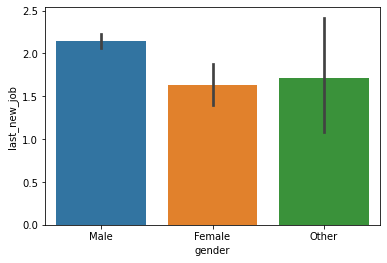

In [16]:
sns.barplot(x="gender", y="last_new_job", data=df)

In this barplot you can see that there is a significant difference between men and women, but it is difficult to prove the difference between men and other and women and other because there is an overlap of the confidence.

#### Training hours

<AxesSubplot:xlabel='gender', ylabel='training_hours'>

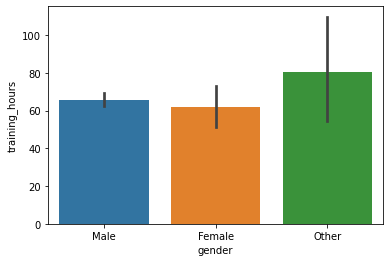

In [17]:
sns.barplot(x="gender", y="training_hours", data=df)

As you can see have the others more hours of training. I just don't know if that means they are more experienced. However, it is difficult to prove anything about the difference between men, women and other because there is an overlap of the confidence.

### Relevant experience

#### Experience

<AxesSubplot:xlabel='relevent_experience', ylabel='experience'>

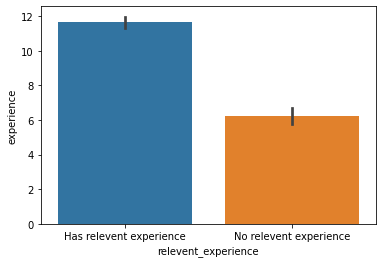

In [18]:
sns.barplot(x="relevent_experience", y="experience", data=df)

As you can see there is a statistically significant difference between people with relevant experience and people with no relevant experience. It can be concluded that people with relavant experience have more experience.

#### Last new job

<AxesSubplot:xlabel='relevent_experience', ylabel='last_new_job'>

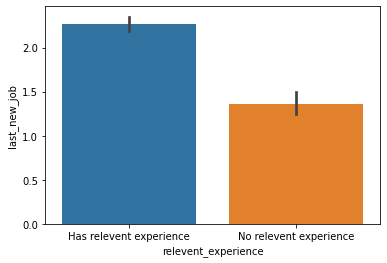

In [19]:
sns.barplot(x="relevent_experience", y="last_new_job", data=df)

In this barplot you can see that there is a statistically significant difference between people with relevant experience and people with no relevant experience. It can be concluded that people with relavant experience are more likely to change jobs.

#### Training hours

<AxesSubplot:xlabel='relevent_experience', ylabel='training_hours'>

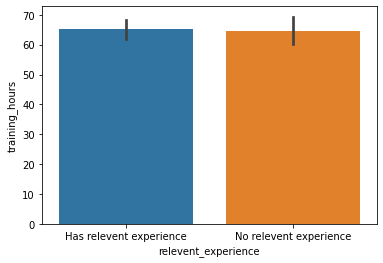

In [20]:
sns.barplot(x="relevent_experience", y="training_hours", data=df)

There is absolutely no visible difference in the number of hours of training from people with and without relevant experience.

### Enrolled university

#### Experience

<AxesSubplot:xlabel='enrolled_university', ylabel='experience'>

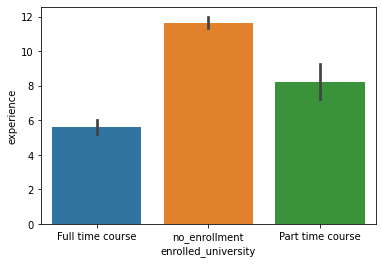

In [21]:
sns.barplot(x="enrolled_university", y="experience", data=df)

As you can see there is a statistically significant difference between the experience of people in comparison with their enrollment. People with no enrollment have more experience than people with a full or part time enrollment.

#### Last new job

<AxesSubplot:xlabel='enrolled_university', ylabel='last_new_job'>

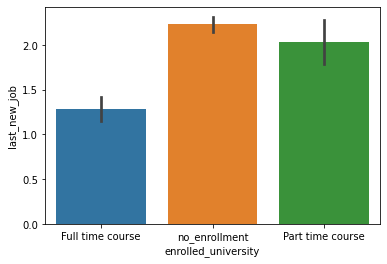

In [22]:
sns.barplot(x="enrolled_university", y="last_new_job", data=df)

In this barplot you can see that there is a difference between full time and part time and full time and no enrollment. People who have full time course are less likely to change jobs. Between part time and no enrollment it is difficult to prove difference because there is an overlap in confidence.

#### Training hours

<AxesSubplot:xlabel='enrolled_university', ylabel='training_hours'>

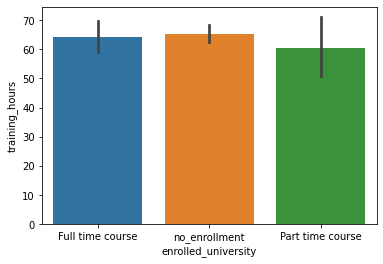

In [23]:
sns.barplot(x="enrolled_university", y="training_hours", data=df)

There is absolutely no visible difference in the number of hours of training from people who have full time course, part time course or no enrollment. 

### Education level

#### Experience

<AxesSubplot:xlabel='education_level', ylabel='experience'>

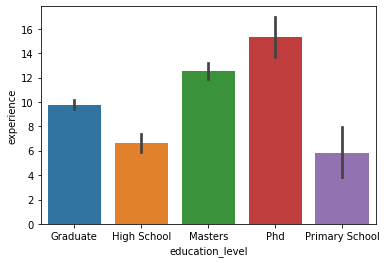

In [24]:
sns.barplot(x="education_level", y="experience", data=df)

As you can see there is een noticeable difference between the levels of education and the experience people have. Only between high school and primary school it is difficult to prove the difference because there is an overlap in confidence.

#### Last new job

<AxesSubplot:xlabel='education_level', ylabel='last_new_job'>

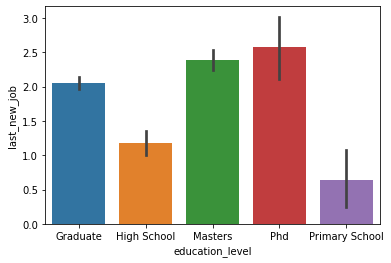

In [25]:
sns.barplot(x="education_level", y="last_new_job", data=df)

In this barplot there are noticeable differences but hard to prove because there is an overlap in confidence between high school and primary school but also between masters and Phd.

#### Training hours

<AxesSubplot:xlabel='education_level', ylabel='training_hours'>

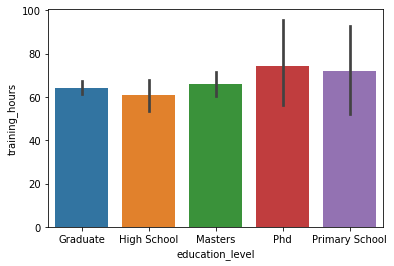

In [27]:
sns.barplot(x="education_level", y="training_hours", data=df)

There is no significant difference between the hours of training and the education level because there is een overlap in confidence.